# Exploratory Data Analysis

Iris data set:

- 3 species: setosa, versicolor, virginica

- 150 observations, 4 features each
    - sepal length
    - sepal width
    - petal length
    - petal width
    
Reference: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

iris = datasets.load_iris()
data = iris.data
df_iris = pd.DataFrame(data)
df_iris.shape

(150, 4)

In [2]:
df_iris.columns

RangeIndex(start=0, stop=4, step=1)

In [3]:
df_iris.head(1)

,0,1,2,3
0,5.1,3.5,1.4,0.2


In [4]:
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [5]:
# create species names list
setosa = ('setosa,' * 50).split(',')
setosa = setosa[0:50]
versicolor = ('versicolor,' * 50).split(',')
versicolor = versicolor[0:50]
virginica = ('virginica,' * 50).split(',')
virginica = virginica[0:50]
species = setosa + versicolor + virginica

In [6]:
df_iris['species'] = species
print('Shape', df_iris.shape)
df_iris.head()

Shape (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**NOTE**:

There a three different dataframe plot idioms:

```py
df.plot(kind='hist')

df.plt.hist()

df.hist()
```

`.plot()` method will place the Index values(the row index) on the x-axis by default, in this example the observation number.

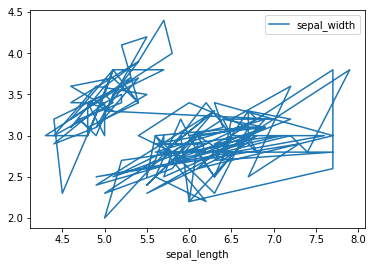

In [7]:
# for a 3-D dataset a plot does not work
df_iris.plot(x='sepal_length', y='sepal_width')
plt.show()

Scatter plots are a good choice for plotting two variables against one another. Scatter plots require that the `x` and `y` columns be chosen by specifying the `x` and `y` parameters inside `.plot()`. 

`s` the radius of each circle to plot, in pixels, assign a list.
`alpha` shows population density

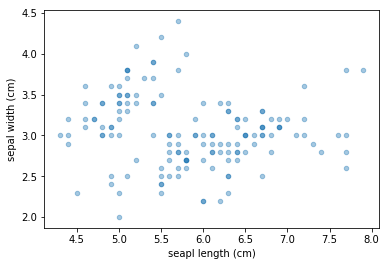

In [8]:
# scatter plot
df_iris.plot(kind='scatter', x='sepal_length', y='sepal_width', alpha='0.4')
plt.xlabel('seapl length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

Individual variable distributions are likely more informative than plotting two variables against each other, use boxplots and histograms.

A `boxplot` shows the `max`/`min` with the 'whiskers', the `quartile range` with the box edges and the median inside.

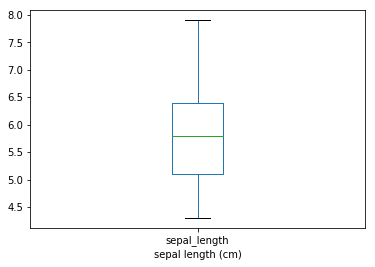

In [9]:
# Box Plot
df_iris.plot(kind='box', y='sepal_length')
plt.xlabel('sepal length (cm)')
plt.show()

Histograms show frequencies counted within certain intervals(ranges) or `bins`. The result approximates a **probability distribution function** or **PDF** of that particular feature. 

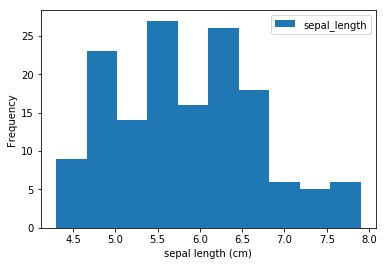

In [10]:
# histogram
df_iris.plot(kind='hist', y='sepal_length')
plt.xlabel('sepal length (cm)')
plt.show()

We can redraw the histogram to get a better sense of the data by using histogram 'options'

- `bins` (int value) number of intervals or bins
- `range` (tuple) bin range, min/max to display
- `normed` (boolean) whether to normalize to one (replaced with `density`).
- `cumulative` (boolean) compute the CDF(Cumulative Distribution Function)
- etc

/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


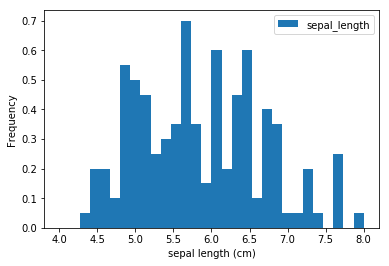

In [11]:
# Normalized histogram
df_iris.plot(kind='hist', y='sepal_length', bins=30, range=(4,8), normed=True)
plt.xlabel('sepal length (cm)')
plt.show()

The histogram suggests three distinct peaks, suggesting sub-populations in the data.

Another useful plot is the CDF, computed by adding up the areas of the rectangles under a normalized histogram.

CDFs are used to calculate the probability of observing a value in a given range, e.g. a sepal width between 2-4cm. 

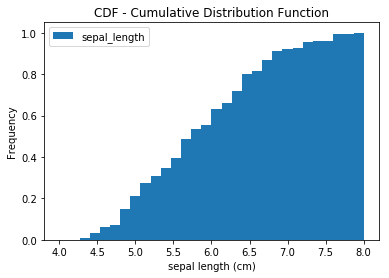

In [12]:
# CDF histogram
df_iris.plot(kind='hist', y='sepal_length', bins=30, range=(4,8), normed=True, cumulative=True)
plt.xlabel('sepal length (cm)')
plt.title('CDF - Cumulative Distribution Function')
plt.show()

While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

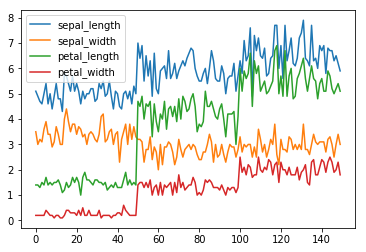

In [13]:
df_iris.plot();

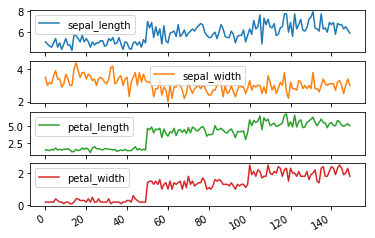

In [14]:
df_iris.plot(subplots=True);

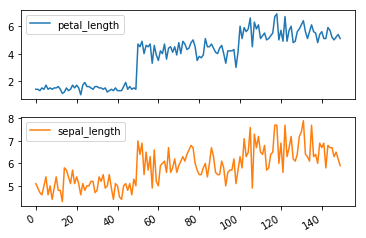

In [15]:
cols = ['petal_length', 'sepal_length']
df_iris[cols].plot(subplots=True);

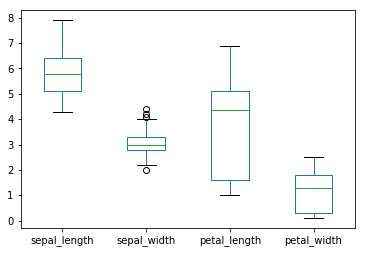

In [16]:
df_iris.plot(kind='box'); 

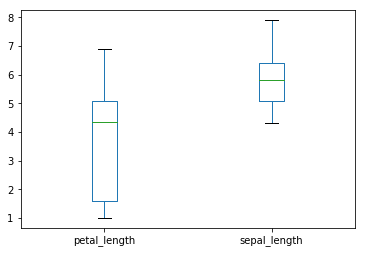

In [17]:
df_iris[cols].plot(kind='box');

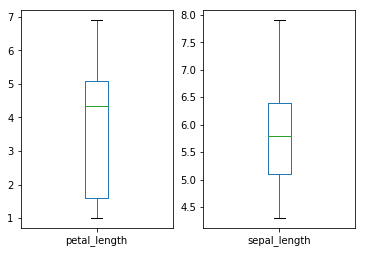

In [18]:
df_iris[cols].plot(kind='box', subplots=True);

When calling `.describe()` on a dataframe, it only reports on numerical columns. However, when called on a non-numerical column directly:

In [43]:
df_iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

The results tell us we are looking at **categorical** data.

- `count` is the number of non-null values
- `unique` is the number of distinct values/categories
- `top` is the most frequent category(3-way tie in this example)
- `freq` is the count of the most frequent category

To discover the **unique** values in the `species` column, use the `.unique()` method

In [44]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Since we have three distinct categories, it makes sense to carry out EDA on each separately.

We can extract rows corresponding to each species by filtering.

1. define the **indices** on which to silce the dataframe

In [47]:
indices = df_iris['species'] == 'setosa'

2. slice on those indices, returning a subset of the original dataframe

In [49]:
df_iris_setosa = df_iris.loc[indices, :]
df_iris_setosa.shape

(50, 5)

3. repeat the process with the other categories

In [52]:
indices = df_iris['species'] == 'versicolor'
df_iris_versicolor = df_iris.loc[indices, :]

indices = df_iris['species'] == 'virginica'
df_iris_virginica = df_iris.loc[indices, :]

4. verify that each has unique values using `.unique()`

In [53]:
df_iris_setosa['species'].unique()

array(['setosa'], dtype=object)

In [54]:
df_iris_versicolor['species'].unique()

array(['versicolor'], dtype=object)

In [55]:
df_iris_virginica['species'].unique()

array(['virginica'], dtype=object)

5. As it's no longer required, we can delete the `species` column from each or our subsets

In [56]:
del df_iris_setosa['species'], df_iris_versicolor['species'], df_iris_virginica['species']

### Visualizing our datasets

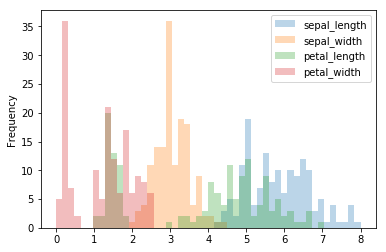

In [59]:
# full dataset
df_iris.plot(kind='hist', bins=50, range=(0,8), alpha=0.3);
plt.show()

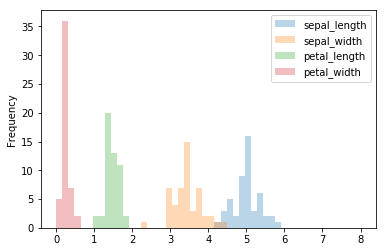

In [60]:
# setosa
df_iris_setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3);
plt.show()

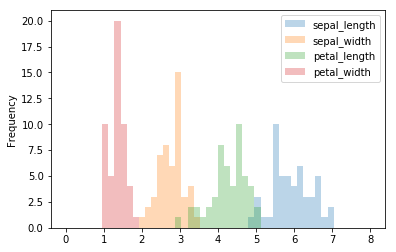

In [61]:
# versicolor
df_iris_versicolor.plot(kind='hist', bins=50, range=(0,8), alpha=0.3);
plt.show()

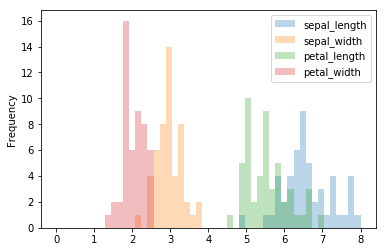

In [62]:
# virginica
df_iris_virginica.plot(kind='hist', bins=50, range=(0,8), alpha=0.3);
plt.show()

### EDA tips.csv

Plot a **PDF** and **CDF** for the fraction column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the **PDF**, you need to specify `normed=True` in your call to `.hist()`, and when plotting the **CDF**, you need to specify `cumulative=True` in addition to `normed=True`.

`ax=axes[0]` means that the plot will appear in the first row.
`ax=axes[1]` means that the plot will appear in the second row.

In [19]:
df_tips = pd.read_csv('data/tips.csv')
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'fraction'],
      dtype='object')

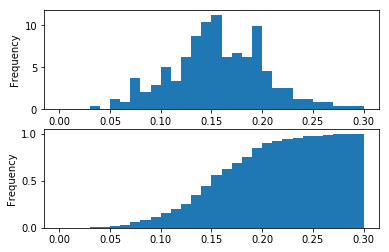

In [20]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df_tips.fraction.plot(ax=axes[0], kind='hist', range=(0,.3), bins=30, normed=True)

# Plot the CDF
df_tips.fraction.plot(ax=axes[1], kind='hist', range=(0,.3), bins=30, normed=True, cumulative=True, )

plt.show()

### Statistical Analysis

Use the pandas `.describe()` to provide summary stats of all the numercial columns within a dataframe.

- `count` number of entries
- `mean` average of entries
- `min/max` min and max entries
- `std` standard deviation
- `25%`, `50%`,`75%` 1st, 2nd(median) and 3rd quantiles respectively 

In [21]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# apply 'describe' on a single column
df_iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

`count()` on a series, ie. a column, returns a scalar integer

In [23]:
df_iris.sepal_length.count()

150

`count()` on a dataframe, returns a series of counts coputed over each column.

In [24]:
df_iris[['petal_length', 'petal_width']].count()

petal_length    150
petal_width     150
dtype: int64

`mean()` on a series/column calculates the average of the column, ignoring null entries.

In [25]:
df_iris.sepal_length.mean()

5.843333333333334

`mean()` on a dataframe computes the average column-wise, ignoring null entries

In [26]:
df_iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Standard deviation measures the spread/deviation of values about the mean.

On the dataframe it is calculated column-wise

In [27]:
df_iris.sepal_length.std()

0.828066127977863

In [28]:
df_iris.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

`median()` returns the 'middle' value, half of the values occur below this point.

In [29]:
df_iris.sepal_length.median()

5.8

In [30]:
df_iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

`.quantile()` compute the value of the observations that occur below this point.

In [31]:
df_iris.sepal_length.quantile(0.5)

5.8

Calcuate the quartile range(0.25-0.5) - half of the data collected lies in this range.

In [32]:
q = [0.25, 0.75]
df_iris.sepal_length.quantile(q)

0.25    5.1
0.75    6.4
Name: sepal_length, dtype: float64

In [33]:
df_iris.quantile(q)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


The range is the interval between the smallest and largest observations, given to the `.min()` and `.max()` methods respectively.

In [34]:
df_iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [35]:
df_iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

We can use the `plot()` method with `kind='box'` to visualize the exact same data computed by the `.describe()` method. You can see the min/max, interquartile range, median for all numerical columns of the datarame. In addition any outliers outside of the 'whiskers'.

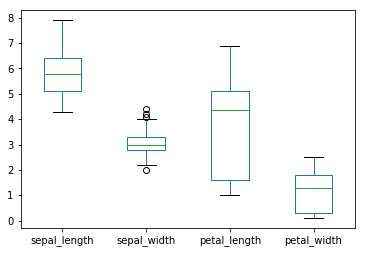

In [36]:
df_iris.plot(kind='box');

### Stats on Bachelor Degrees

In [37]:
df_deg = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
print('Shape', df_deg.shape)
df_deg.columns

Shape (42, 18)


Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

In [38]:
df_deg.head(2)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2


In [39]:
# load 'Year' as index colulmn
# df_deg = df_deg.drop(['Year'], axis=1) # drop the 'Year column'
df_deg = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv', index_col=0)
print('Shape', df_deg.shape)
df_deg.columns

Shape (42, 17)


Index(['Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

In [40]:
# by default axis='rows' --> returns the mean for each column
df_deg.mean()

Agriculture                      33.848165
Architecture                     33.685540
Art and Performance              61.100000
Biology                          49.429864
Business                         40.653471
Communications and Journalism    56.216667
Computer Science                 25.809524
Education                        76.356236
Engineering                      12.892857
English                          66.186680
Foreign Languages                71.723810
Health Professions               82.983333
Math and Statistics              44.478571
Physical Sciences                31.304762
Psychology                       68.776190
Public Administration            76.085714
Social Sciences and History      45.407143
dtype: float64

In [41]:
# calculate the mean percentage per year
mean = df_deg.mean(axis='columns')
mean

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
1975    42.373672
1976    44.015581
1977    45.673823
1978    47.308670
1979    48.811798
1980    49.980583
1981    50.974090
1982    52.009448
1983    52.187399
1984    52.474007
1985    52.399548
1986    52.752830
1987    53.169798
1988    53.130635
1989    53.305542
1990    53.737364
1991    53.471622
1992    53.262399
1993    53.199202
1994    53.238427
1995    53.508401
1996    53.941559
1997    54.446953
1998    55.227195
1999    55.971538
2000    56.501939
2001    56.946913
2002    57.181722
2003    57.367542
2004    57.019094
2005    56.723782
2006    56.262194
2007    56.053781
2008    55.903924
2009    56.026406
2010    55.883043
2011    55.999587
dtype: float64

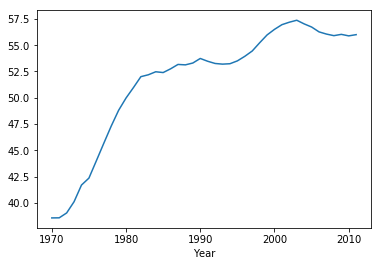

In [42]:
mean.plot();

It looks like there has generally been an upward trend since 1970.